In [ ]:
# Netflix EDA Starter Notebook

# 📺 Netflix Shows EDA Project

This project performs Exploratory Data Analysis (EDA) on a Netflix dataset to understand trends in the type of content Netflix offers, release patterns over the years, popular genres, and more. The dataset includes titles, descriptions, cast, genre tags, duration, and release information.

Dataset Source: [Netflix Titles on Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)


In [11]:
# --- Step 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Optional: Inline plotting for Jupyter
%matplotlib inline

## 🛠️ Importing Required Libraries

We start by importing the required Python libraries for data handling, visualization, and exploration.


In [3]:
# --- Step 2: Load the Dataset ---
# Adjust the path based on your folder structure
df = pd.read_csv('../data/netflix_titles.csv')


## 📥 Loading the Dataset

We load the `netflix_titles.csv` dataset and take a quick look at the structure.


In [4]:
# --- Step 3: Initial Exploration ---
print("\n--- Head of DataFrame ---")
print(df.head())

print("\n--- Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Head of DataFrame ---
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2 

## 🔍 Basic Dataset Overview

We examine the dataset's shape, column types, and check for missing values.


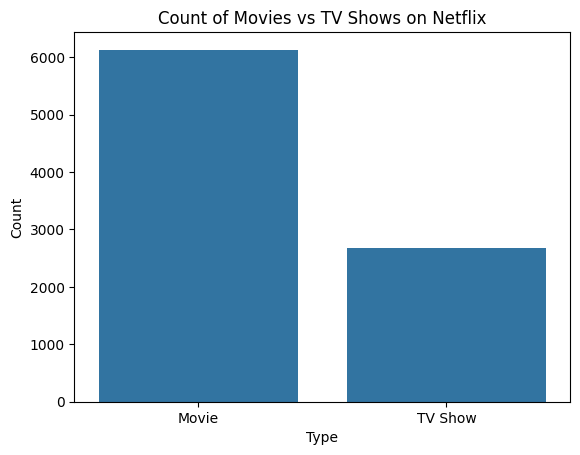

In [5]:
# --- Step 4: Content Type Count ---
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## 🎬 Count of Movies vs TV Shows

Let's see the overall distribution between Movies and TV Shows available on Netflix.


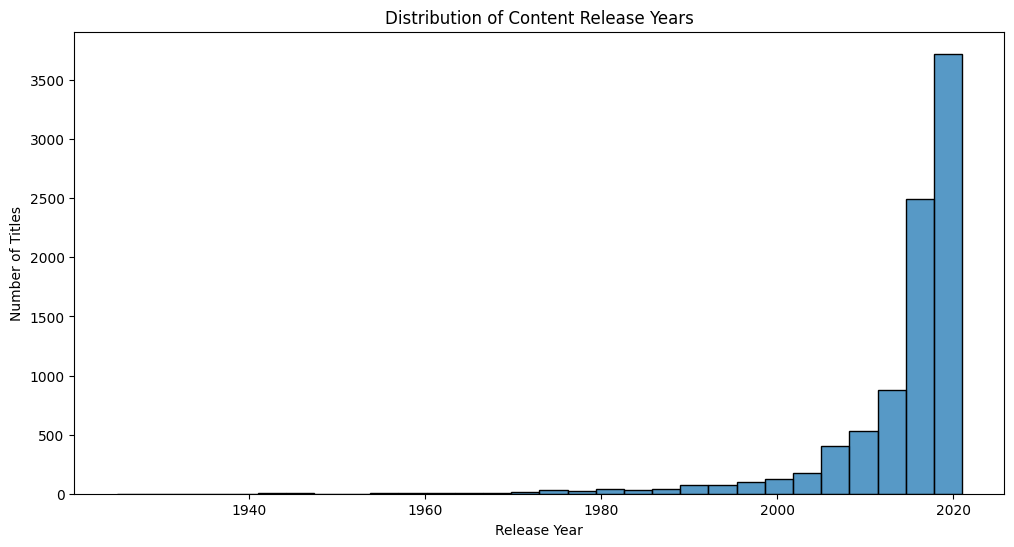

In [6]:
# --- Step 5: Content Release Year Distribution ---
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='release_year', bins=30, kde=False)
plt.title('Distribution of Content Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

## 📅 Release Year Distribution

This chart shows the number of titles released by year. It helps us understand when Netflix added the most content.


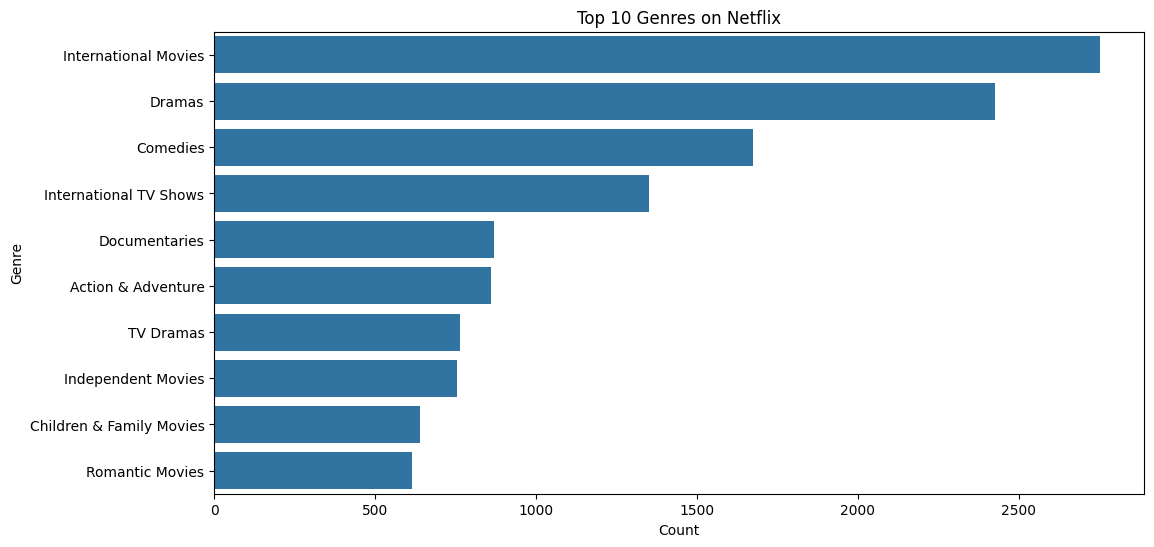

In [10]:
# --- Step 6: Top Genres ---
all_genres = df['listed_in'].dropna().str.cat(sep=', ').split(', ')
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=genre_df.head(10), x='Count', y='Genre')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


## 🎭 Top Genres on Netflix

We extract and count the genres listed in the `listed_in` column to find out the most common genres across all titles.


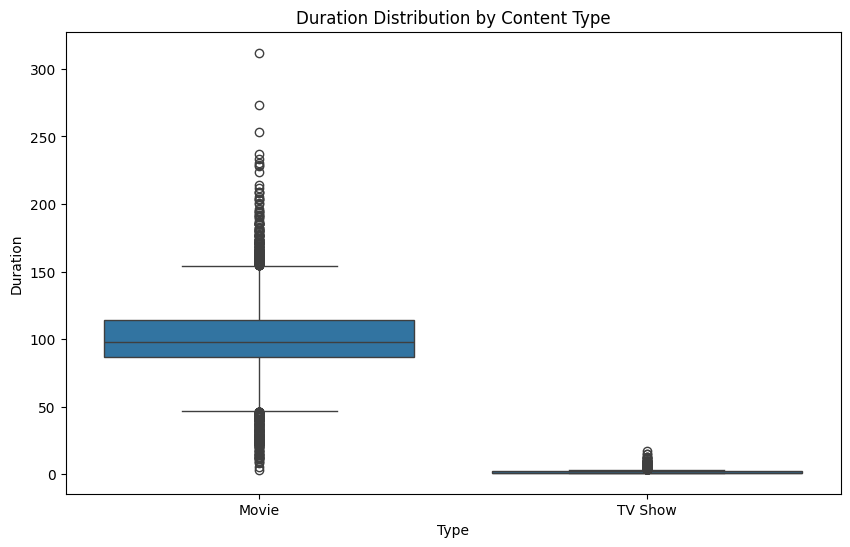

In [8]:
# --- Step 7: Duration Analysis ---
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract(r'([a-zA-Z]+)')

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='type', y='duration_num')
plt.title('Duration Distribution by Content Type')
plt.xlabel('Type')
plt.ylabel('Duration')
plt.show()

# --- Future Ideas (optional) ---
# - Word cloud of descriptions
# - Content added per year
# - Most frequent cast members
# - Ratings breakdown

## ⏱️ Duration Analysis by Content Type

We analyze the average and spread of content duration (in minutes for movies and seasons for shows) using a box plot.


## 💡 Further Analysis Ideas

- 🔠 Word cloud of descriptions or titles
- 🎞️ Most frequent actors/actresses
- 🌍 Country-wise distribution of content
- 📅 Trend of new additions to Netflix over time
- 🏷️ Ratings breakdown (e.g., TV-MA, PG-13)

We'll explore some of these next in future updates.
